# This script downloads NDVI (Normalized Difference Vegetation Index) data

# Import Dependencies/Packages

In [3]:
### 1. imports
import s3fs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import datetime
import boto3
import botocore
import pooch
import os
import tempfile

# File request function

In [2]:
### File request function
def pooch_load(filelocation="", filename=""):
    shared_location = "/home/jovyan/shared/Data/tutorials/W1D3_RemoteSensingLandOceanandAtmosphere"  
    #shared_location = "/home/jovyan/shared-public/Hesperosaurus_Bon_Fortepiano/data_dir"
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation, known_hash=None, fname=os.path.join(user_temp_cache, filename)
        )

    return file



### Function to call Data Download for given year
def download_data(year, output_dir="vegetation-data" ,out_file=f"NDVI.nc", bbox=None):
    # bbox = [29.579, 35.035, 4.249, -1.443, ] [W, E, N, S]
    
    fs = s3fs.S3FileSystem(anon=True) 
    #sn-->sensor name, pc1-->product category, pv-->product version, pc2-->product code, sp-->satellite platform
    if year < 2014:
        sn_pc1_pv_pc2_sp = "/AVHRR-Land_v005_AVH13C1_*"
    else:
        sn_pc1_pv_pc2_sp = "/VIIRS-Land_v001-preliminary_NPP13C1_S-NPP_*"
    file_location = []
    file_location_temp = fs.glob(
        "s3://noaa-cdr-ndvi-pds/data/"
        + f"{year}"
        + sn_pc1_pv_pc2_sp
        + "*"
        + "_c*.nc"
    )
    
    file_location = file_location + file_location_temp
    
    
    file_ob = [
        pooch_load(filelocation="http://s3.amazonaws.com/" + file, filename=file)
        for file in file_location
    ]

    if bbox != None:
        ds = xr.open_mfdataset(file_ob, combine="nested", concat_dim="time")
        # Define bounding box for slice region  (Change to match your region of interest/ study area)
        #[left_longitude, right_longitude, upper_latitude, lower_latitude]
        # bbox = [29.579, 35.035, 4.249, -1.443, ]
        ds = ds.sel(longitude=slice(bbox[0], bbox[1]), latitude=slice(bbox[2], bbox[3]))


        ds.to_netcdf(f"{output_dir}/{out_file}")

        ds.close()

In [3]:
### Invoke the download function here
bbox = [12, 34, 9.3, -13.4]
for year in range(2021, 2023):
    print(f"Downloading data for {year} \n\n\n")
    download_data(year, output_dir="vegetation-data" ,out_file=f"NDVI_{year}_congo_river_basin.nc", bbox=bbox);

SHA256 hash of downloaded file: 5b4ae65b7d376f56edb115145ead5ca2aad88cfbb05cf25e42edc85c13b78c71
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: e368de1e11c86e9b1d1dded4f7436a77b36d437ae174124a565e430d16a4f8bb
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: e605f095ed95fa829194e899dc3cff7db90429f1674e9a26ec347e1243ab7e42
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 192eba1bf32179140b857be5ea7bed29fbf2f9f9b113309921b381906b16fa75
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 3cfd

SHA256 hash of downloaded file: a0414093cc16a67ad3caea87d30b21c028d2880055132951d3755ca923c9bd3b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 7539c8fffa412e76b36ad206ddebbf985e27d71c0e1bc8c45ce53e1ae9fee520
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 08dec2bde1319fcacc9491b6ff2f4f45d29ff06b5b43333540074eff957fe451
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 3150d4a6db045a933be6b9a53f7aa2d7229cf1cffdab0a6f86efb160466995e6
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 13f6

In [1]:
pwd

'/home/jovyan/shared-public/Hesperosaurus_Bon_Fortepiano/data_dir'

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


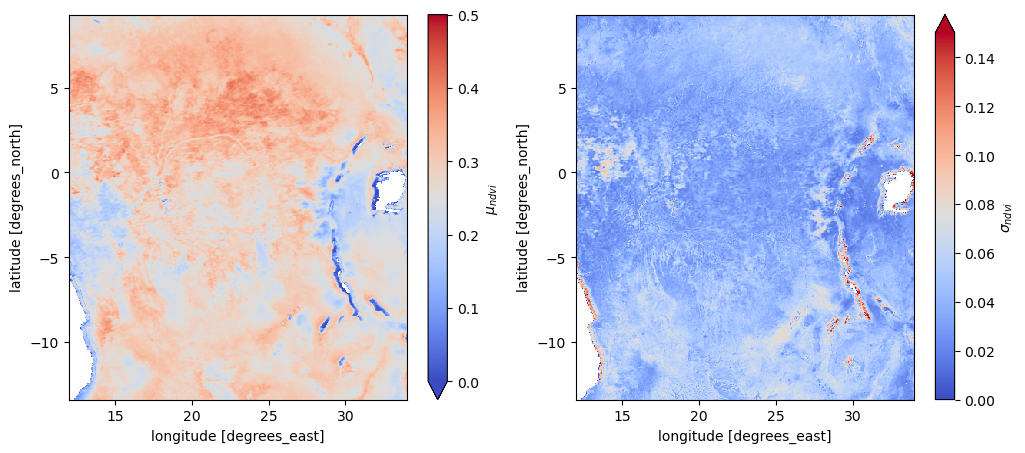

In [4]:
ds = xr.open_mfdataset('/home/jovyan/shared-public/Hesperosaurus_Bon_Fortepiano/data_dir/vegetation-data/NDVI_*_congo_river_basin.nc', combine="nested", concat_dim="time")

ndvi = ds.groupby('time.year').mean('time')['NDVI']

fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ndvi.mean('year').rename('$\mu_{ndvi}$').plot(
    vmin=0, vmax=0.5, cmap='coolwarm', ax = axes[0])

ndvi.std('year').rename('$\sigma_{ndvi}$').plot(
    vmin=0, vmax=0.15, cmap='coolwarm', ax = axes[1])